In [1]:
import numpy as np
import matplotlib.pyplot as plt
import qcodes as qc
from qcodes.instrument_drivers.nplab_drivers.Keithley_2182a import Keithley_2182a
from qcodes.instrument_drivers.nplab_drivers.Keithley_6221 import Keithley_6221
import time

k6 = Keithley_6221('k6', 'GPIB::12::INSTR')
station = qc.Station(k6)
k6.current.inter_delay = 0.5
k6.current.step = 1e-9
k6.unit('OHMS')

C:\Users\nplab\Anaconda3\envs\qcodes\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Connected to: KEITHLEY INSTRUMENTS INC. 6221 (serial:4307474, firmware:D03  /700x) in 0.11s


# Trying out the timemeas=True option

In [2]:
start = -10e-6
stop = 10e-6
step = 0.1e-6
delta = 0.5e-6
delay = 0.2
k6.delta_diff_setup(start, stop, step, delta, delay, timemeas=True)

C:\Users\nplab\Anaconda3\envs\qcodes\lib\site-packages\qcodes\qcodes\instrument\parameter.py:209: UserWarning: Wrapping get method, original get method will not be directly accessible. It is recommended to define get_raw in your subclass instead.
  warnings.warn('Wrapping get method, original get method will not '


In [3]:
meas = qc.Measure(k6.deltadcon)
tdata2 = meas.get_data_set(name='tryingouttime')
meas.run()
k6.abort_arm()

DataSet:
   location = 'data/2018-01-24/#003_tryingouttime_11-34-27'
   <Type>   | <array_id> | <array.name> | <array.shape>
   Setpoint | number_set | number       | (201,)
   Measured | k6_dcon    | dcon         | (201,)
   Measured | k6_time    | time         | (201,)
acquired at 2018-01-24 11:35:15


The setup seems to require two setpoint arrays, so I had to introduce number_set

In [4]:
tdata2.arrays

{
  'current_set': DataArray[201]: current_set
    array([-1.0e-05, -9.9e-06, -9.8e-06, -9.7e-06, -9.6e-06, -9.5e-06,
           -9.4e-06, -9.3e-06, -9.2e-06, -9.1e-06, -9.0e-06, -8.9e-06,
           -8.8e-06, -8.7e-06, -8.6e-06, -8.5e-06, -8.4e-06, -8.3e-06,
           -8.2e-06, -8.1e-06, -8.0e-06, -7.9e-06, -7.8e-06, -7.7e-06,
           -7.6e-06, -7.5e-06, -7.4e-06, -7.3e-06, -7.2e-06, -7.1e-06,
           -7.0e-06, -6.9e-06, -6.8e-06, -6.7e-06, -6.6e-06, -6.5e-06,
           -6.4e-06, -6.3e-06, -6.2e-06, -6.1e-06, -6.0e-06, -5.9e-06,
           -5.8e-06, -5.7e-06, -5.6e-06, -5.5e-06, -5.4e-06, -5.3e-06,
           -5.2e-06, -5.1e-06, -5.0e-06, -4.9e-06, -4.8e-06, -4.7e-06,
           -4.6e-06, -4.5e-06, -4.4e-06, -4.3e-06, -4.2e-06, -4.1e-06,
           -4.0e-06, -3.9e-06, -3.8e-06, -3.7e-06, -3.6e-06, -3.5e-06,
           -3.4e-06, -3.3e-06, -3.2e-06, -3.1e-06, -3.0e-06, -2.9e-06,
           -2.8e-06, -2.7e-06, -2.6e-06, -2.5e-06, -2.4e-06, -2.3e-06,
           -2.2e-06, -2.1e-06,

In [4]:
plot = qc.QtPlot(tdata2.k6_time, tdata2.k6_dcon)

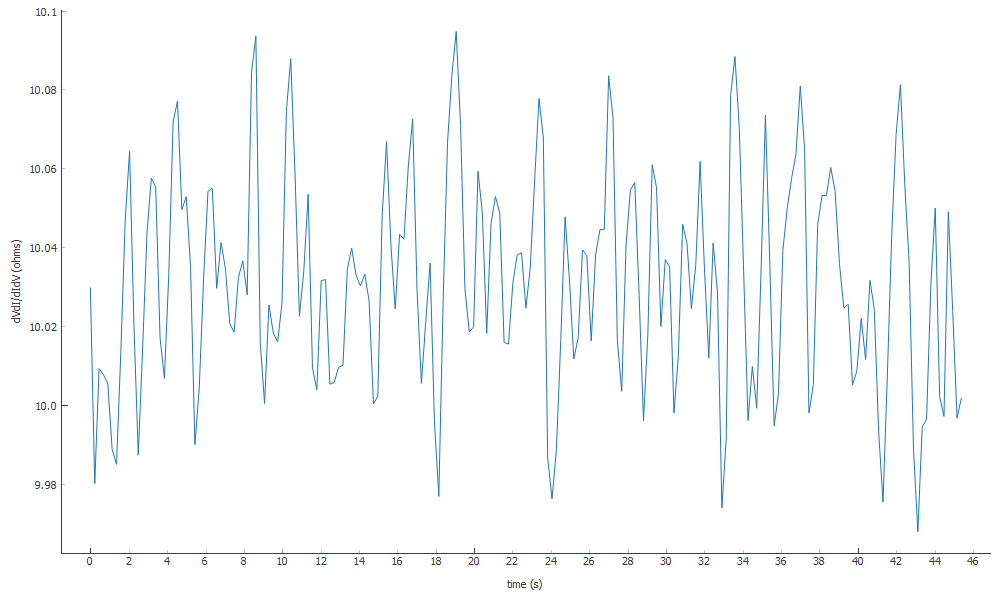

In [5]:
plot